In [12]:
import torch
import unet_model
from skimage import io
from torchvision import transforms
import test_train as tt

device = torch.device("cuda")
model = unet_model.UNet(3,3)
model.load_state_dict(torch.load('model_weights.pt'))
model.to(device)
model.eval()

image = io.imread('kodak/kodim01.png')
trans = transforms.Compose([tt.Resize((512,768)),tt.Normalize(),tt.ToTensor()])
timg = torch.unsqueeze(trans(image),0)
timg = torch.normal(timg, 75/255)
timg = timg.to(device=device)

print(timg.shape)

with torch.no_grad():
    mimg = model(timg)

torch.Size([1, 3, 512, 768])


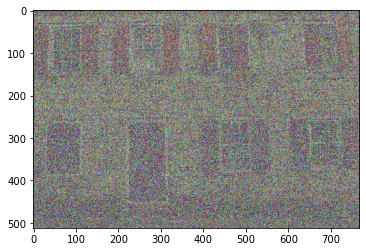

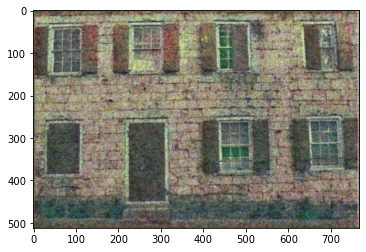

In [13]:
import matplotlib.pyplot as plt
import numpy as np

cleaned = (mimg.to('cpu').numpy()[0] * 255).transpose(1,2,0).astype(np.uint8)
noisey  = (timg.to('cpu').numpy()[0] * 255).transpose(1,2,0).astype(np.uint8)

plt.imshow(noisey)
plt.figure()
plt.imshow(cleaned)